# Loan Application Status Prediction

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
d = pd.read_csv('loan_application.csv')

In [6]:
df = pd.DataFrame(d)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Number of  rows are 614

Four float columns , 1 int and 8 object columns

some columns have null values

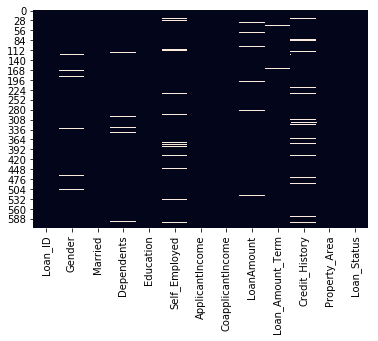

In [10]:
sns.heatmap(df.isnull(),cbar=False)

From the above heatmap Six columns: 
    
Gender , Dependents , Self_employeed , LoanAmount , Loan_Amount_Term , Credit_History have null values

In [11]:
features_with_null = [i for i in df if df[i].isnull().sum()>=1]

In [12]:
features_with_null

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Also married has null values that was not visible in the heatmap

In [13]:
for i in features_with_null:
    print(i,df[i].isnull().mean())
        

Gender 0.021172638436482084
Married 0.004885993485342019
Dependents 0.024429967426710098
Self_Employed 0.05211726384364821
LoanAmount 0.035830618892508145
Loan_Amount_Term 0.02280130293159609
Credit_History 0.08143322475570032


Above are the percentage of null values:
    
Credit_history has maximum null values (8%)

Married has least null values (0.2%)

Dependents , Loan_Amount_Term , Gender have (2%) of null values

Self_employed has 5 % of null values 

LoanAmount has 3% of null values




In [14]:
df['Dependents'].value_counts() # No of dependents (0 to 3+)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df['Gender'].value_counts()   #number of male  = 489 and female  = 112

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
df['Loan_Amount_Term'].value_counts()  

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan_Amount term ranges from 360 to 12

Maximum frequency is of 360

least frequency is of 12

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

self employed people  = 82

(quite large difference in both the values)


In [18]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

replacing null values in loan_amount term and loan_amount with median

In [21]:
df['Self_Employed'] = np.where(df['Self_Employed'].isnull(),'Missing_value',df['Self_Employed'])

creating new category 'missing_value' as already existing values has large difference in frequencies

In [22]:
df['Self_Employed'].value_counts()

No               500
Yes               82
Missing_value     32
Name: Self_Employed, dtype: int64

In [23]:
df['Credit_History'] = np.where(df['Credit_History'].isnull(),'missing',df['Credit_History'])

creating new category 'missing' as already existing values has large difference in frequencies

In [24]:
df['Dependents'] = np.where(df['Dependents'].isnull(),df['Dependents'].mode(),df['Dependents'])

In [25]:
df['Gender'] = np.where(df['Gender'].isnull(),df['Gender'].mode(),df['Gender'])

In [26]:
df['Married'] = np.where(df['Married'].isnull(),df['Married'].mode(),df['Married'])

replacing null with mode in gender , dependents and married

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

seperating numerical and categorical columns

In [28]:
numerical_feat = [i for i in df if df[i].dtypes!='O']

In [29]:
numerical_feat

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [30]:
categorical_feat  =  [i for i in df if df[i].dtypes=='O']

In [31]:
categorical_feat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()

In [34]:
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

In [35]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

422 records with  yes loan_status

192 records with no loan_status

# Univariate analysis

ApplicantIncome


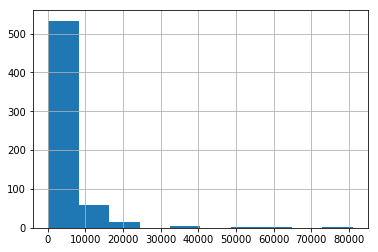

CoapplicantIncome


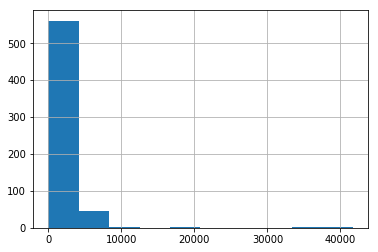

LoanAmount


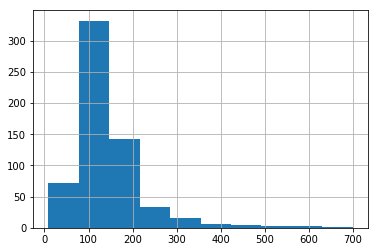

Loan_Amount_Term


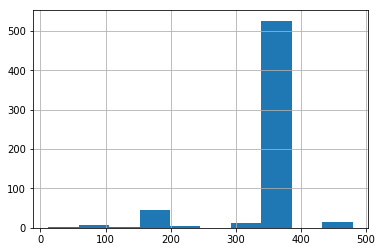

In [36]:
for i in numerical_feat:
    print(i)
    df[i].hist()
    plt.show()

Applicant Income lies mostly between 0 to 10K 

Frequencied between 30k to 40k and 70k to 80k is very less

Coapplicant income lies mostly in 0 to 5k

LoanAmount values lies betwwn 0 to 200

maximum LoanAmountTerm values lies from 300 to 400



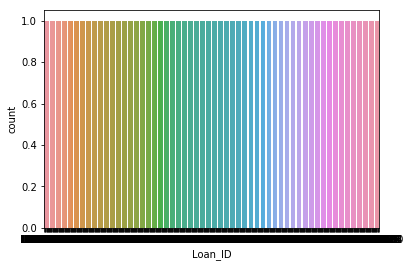

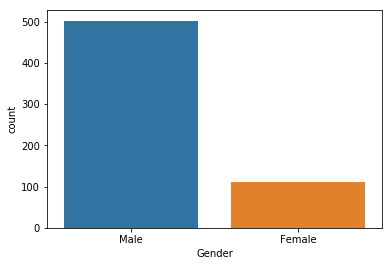

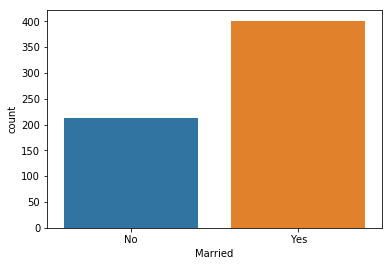

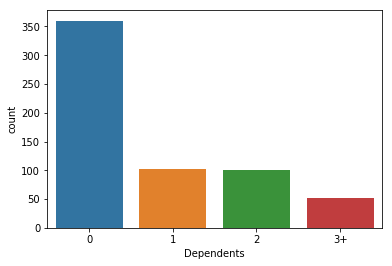

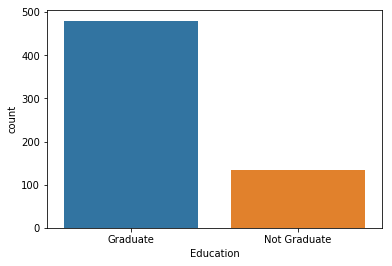

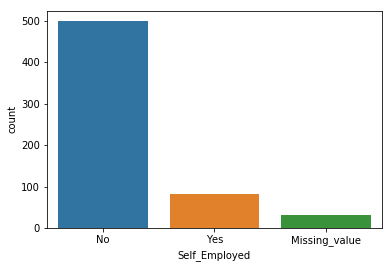

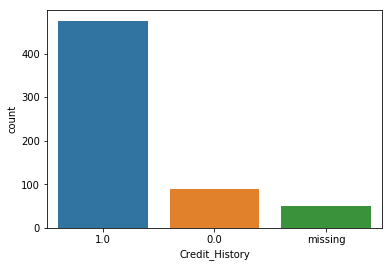

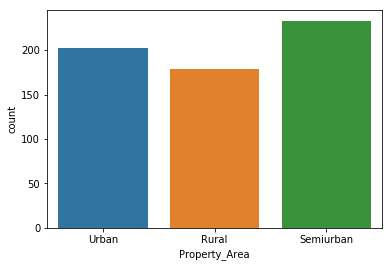

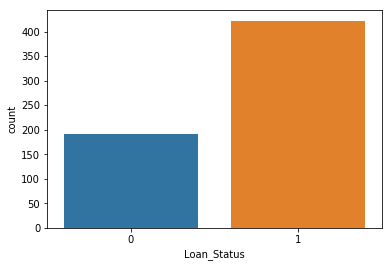

In [37]:
for i in categorical_feat:
    sns.countplot(df[i])
    plt.show()

Loan_ID are unique values for each record

Number of 2 and 3 dependents are almost equal 

Number of graduates are 480(app.) and not graduates are 110(app.)

Number of people in semiurban are maximum and in  rural area is minimum 

Bivariate analysis

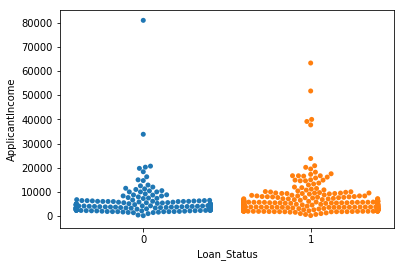

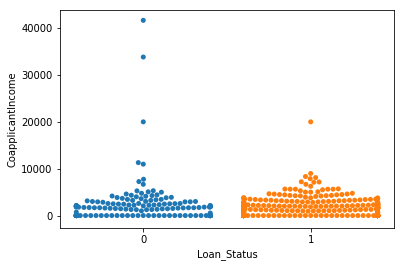

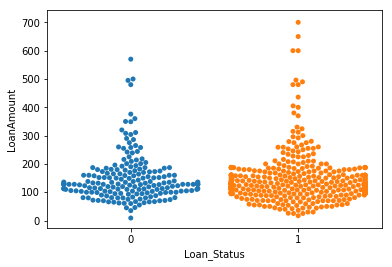

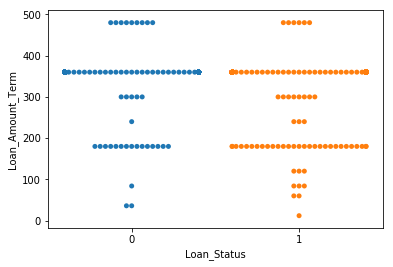

In [38]:
for i in numerical_feat:
    sns.swarmplot(x='Loan_Status',y=df[i],data=df)
    plt.show()

It does not seems any specific difference on loan_status (target variable)

On the basis of numerical features

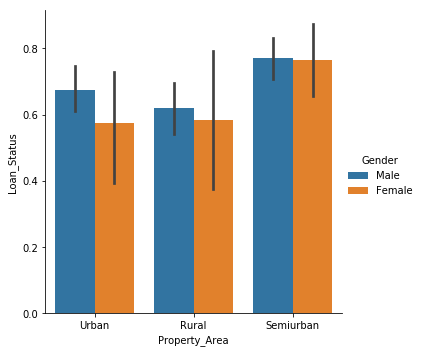

In [39]:
sns.catplot(x='Property_Area',y='Loan_Status',hue='Gender',kind='bar',data=df)


In urban  and rural area    : (Males are more for loan_status=yes)
    
In semiurban loan_status is almost same(for both male and female)
    


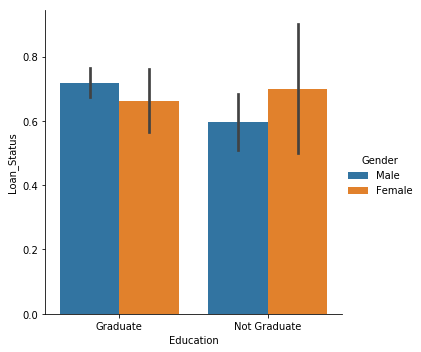

In [40]:
sns.catplot(x='Education',y='Loan_Status',hue='Gender',kind='bar',data=df)

On the basis of education :

Females are more (on not graduate side)

And on graduation side males are more who got loan

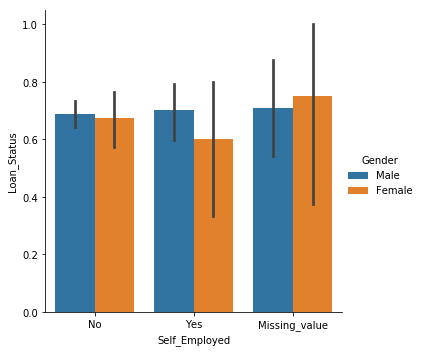

In [41]:
sns.catplot(x='Self_Employed',y='Loan_Status',hue='Gender',kind='bar',data=df)

On the basis of self employed it is almost equal :
    

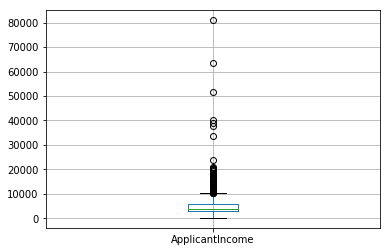

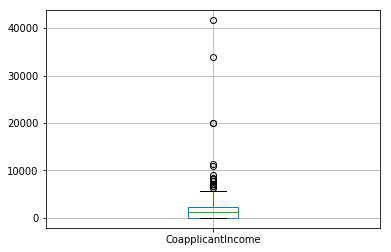

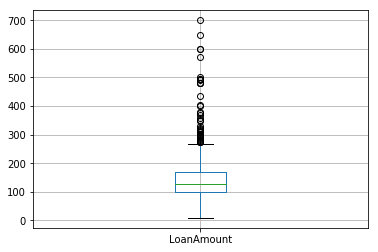

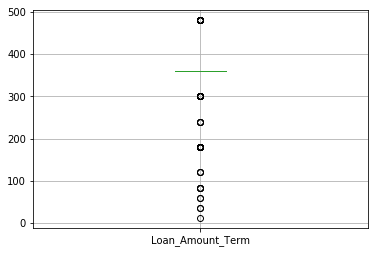

In [163]:
for i in numerical_feat:
    df_new.boxplot(i)
    plt.show()

Outliers are present in each of he features

In [43]:
for i in numerical_feat:
    print(i,df[i].skew())

ApplicantIncome 6.539513113994625
CoapplicantIncome 7.491531216657306
LoanAmount 2.743052748820892
Loan_Amount_Term -2.4021122563890396


Checking skewness before removal of outliers

because the features like applicant and coapplicant incomes  shows outliers are not neccesarily be noise 

it is possible for some abruptly high income , so we remove skewnees first amy remove outliers

In [44]:
from sklearn.preprocessing import power_transform


In [45]:
for i in numerical_feat:
    df[i] = power_transform(df[i].values.reshape(-1,1))

In [46]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
for i in numerical_feat:
    print(i,df[i].skew())

ApplicantIncome -0.09294567889276603
CoapplicantIncome -0.14564645710551902
LoanAmount 0.02083110923009167
Loan_Amount_Term 0.39257134198569293


Skewness is removed : now checking for the the outliers again

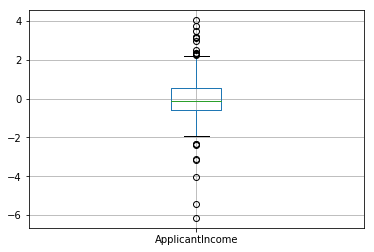

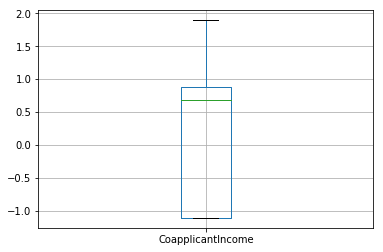

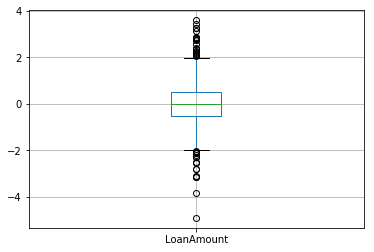

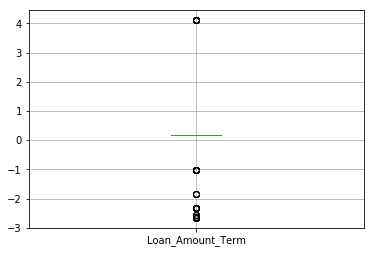

In [48]:
for i in numerical_feat:
    df.boxplot(i)
    plt.show()

In [71]:
q3 = df.LoanAmount.quantile(0.75)

In [72]:
q1 =  df.LoanAmount.quantile(0.25)

In [73]:
print(q1,q3)

-0.5166267258850226 0.4893129441492369


In [74]:
Iqr = q3-q1

In [75]:
lower_lim  = q1 - 1.5*(Iqr)
upper_lim = q3 + 1.5*(Iqr)

In [83]:
print(lower_lim,upper_lim)

-2.0255362309364116 1.9982224492006257


In [84]:
df['LoanAmount'] = np.where(df['LoanAmount']<lower_lim ,df['LoanAmount'].median(),df['LoanAmount'])

In [85]:
df['LoanAmount'] = np.where(df['LoanAmount']>upper_lim ,df['LoanAmount'].median(),df['LoanAmount'])

In [88]:
q3_income = df.ApplicantIncome.quantile(0.75)

In [89]:
q1_income = df.ApplicantIncome.quantile(0.25)

In [90]:
Iqr_income = q3_income - q1_income

In [91]:
lower_lim_income  = q1_income - 1.5*(Iqr_income)
upper_lim_income = q3_income + 1.5*(Iqr_income)

In [92]:
print(upper_lim_income,lower_lim_income)

2.177049452070227 -2.214282252413369


In [93]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']<lower_lim_income ,df['ApplicantIncome'].median(),df['ApplicantIncome'])

In [94]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']>upper_lim_income ,df['ApplicantIncome'].median(),df['ApplicantIncome'])

Replacing outliers with median in applicant income and loan amount

In [96]:
len(df['Loan_ID'].unique())

614

Loan_ID is unique for all th rows

In [97]:
df.drop('Loan_ID',axis=1,inplace=True)

In [98]:
from sklearn.preprocessing import OrdinalEncoder

In [104]:
ord_en = OrdinalEncoder()
df['Gender']= ord_en.fit_transform(df['Gender'].values.reshape(-1,1))

In [105]:
df['Married']= ord_en.fit_transform(df['Married'].values.reshape(-1,1))

In [106]:
df['Dependents']= ord_en.fit_transform(df['Dependents'].values.reshape(-1,1))

In [107]:
df['Education']= ord_en.fit_transform(df['Education'].values.reshape(-1,1))

In [108]:
df['Self_Employed']= ord_en.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [109]:
df['Credit_History']= ord_en.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [110]:
df['Property_Area']= ord_en.fit_transform(df['Property_Area'].values.reshape(-1,1))

In [111]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_n
0,1.0,0.0,0.0,0.0,1.0,0.544331,-1.102837,-0.025462,0.17554,1.0,2.0,1,-0.025462
1,1.0,1.0,1.0,0.0,1.0,0.170974,0.750578,-0.025462,0.17554,1.0,0.0,0,-0.025462
2,1.0,1.0,0.0,0.0,2.0,-0.499955,-1.102837,-1.339826,0.17554,1.0,2.0,1,-0.025462
3,1.0,1.0,0.0,1.0,1.0,-0.743873,0.891686,-0.155876,0.17554,1.0,2.0,1,-0.155876
4,1.0,0.0,0.0,0.0,1.0,0.582817,-1.102837,0.170931,0.17554,1.0,2.0,1,0.170931


In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
sc = MinMaxScaler()

In [114]:
df_n = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

Perfomed scaling and encoding

In [115]:
df_n.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_n
0,1.0,0.0,0.000000,0.0,0.5,0.601032,0.000000,0.499545,0.419525,0.5,1.0,1.0,0.116582
1,1.0,1.0,0.333333,0.0,0.5,0.509702,0.618705,0.499545,0.419525,0.5,0.0,0.0,0.116582
2,1.0,1.0,0.000000,0.0,1.0,0.345580,0.000000,0.165674,0.419525,0.5,1.0,1.0,0.116582
3,1.0,1.0,0.000000,1.0,0.5,0.285913,0.665810,0.466417,0.419525,0.5,1.0,1.0,0.084659
4,1.0,0.0,0.000000,0.0,0.5,0.610446,0.000000,0.549432,0.419525,0.5,1.0,1.0,0.164655


Separating target and independents features

In [117]:
x = df_n.drop('Loan_Status',axis=1)
y= df['Loan_Status']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [120]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy_score(pred,y_test)

0.7881773399014779

Basic model is giving accuracy of 78%

Finding best random_state

In [121]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))

random state 25
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 36
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 127
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 141
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 151
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 188
test accuracy 0.8029556650246306
train accuracy 0.8029197080291971
random state 310
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 450
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 472
test accuracy 0.812807881773399
train accuracy 0.8126520681265207
random state 522
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 646
test accuracy 0.8078817733990148
train accuracy 0.8077858880778589
random state 742
test accuracy 0.8029556650246306
train accuracy 0.802919708029

25 is giving best result

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=25)

In [123]:
from sklearn.feature_selection import RFE
rfe_obj = RFE(estimator=lr,step=1)
rfe_obj = rfe_obj.fit(x_train,y_train)
features = pd.DataFrame({'features_selected':list(x_train.columns),'ranking_offeatures':rfe_obj.ranking_})
features.sort_values(by='ranking_offeatures',ascending=True)

,features_selected,ranking_offeatures
1,Married,1
3,Education,1
6,CoapplicantIncome,1
9,Credit_History,1
10,Property_Area,1
11,LoanAmount_n,1
8,Loan_Amount_Term,2
2,Dependents,3
7,LoanAmount,4
0,Gender,5


In [124]:
x_train_rfe = rfe_obj.transform(x_train)
x_test_rfe = rfe_obj.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)
p = rfe_model.predict(x_test_rfe)
accuracy_score(p,y_test)

0.812807881773399

In [125]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [126]:
algo_list = [DecisionTreeClassifier, KNeighborsClassifier,SVC,LogisticRegression]

In [127]:
for i in algo_list:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    print('-------------------------------------------------------------')

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.7044334975369458
confusion_matrix [[ 41  23]
 [ 37 102]]
classification_report               precision    recall  f1-score   support

           0       0.53      0.64      0.58        64
           1       0.82      0.73      0.77       139

    accuracy                           0.70       203
   macro avg       0.67      0.69      0.68       203
weighted avg       0.72      0.70      0.71       203

-------------------------------------------------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy_score 0.7093596059113301
confusion_matrix [[ 18  46]
 [ 13 126]]
classification_report               precision    recall  f1-score   support

           0       0.58      0.28      0.38        64
           1       0.73      0.91      0.81       139

    accuracy                           0.71       203
   macro avg       0.66      0.59      0.59       203
weighted avg       0.68    

SVC is giving best result

In [129]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
for i in range(3,11):
    lr.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    cross_score = cross_val_score(lr,x,y,cv=i)
    print('cv. ',i)
    print(cross_score.mean())
    print('-------')

accuracy_score 0.8078817733990148
cv.  3
0.8062091503267975
-------
accuracy_score 0.8078817733990148
cv.  4
0.8094919786096255
-------
accuracy_score 0.8078817733990148
cv.  5
0.8078368652538984
-------
accuracy_score 0.8078817733990148
cv.  6
0.8062059775366457
-------
accuracy_score 0.8078817733990148
cv.  7
0.806221077772802
-------
accuracy_score 0.8078817733990148
cv.  8
0.80622009569378
-------
accuracy_score 0.8078817733990148
cv.  9
0.8078289286729183
-------
accuracy_score 0.8078817733990148
cv.  10
0.8079323109465891
-------


kfold 4 is giving best accuracy

In [130]:
for i in algo_list:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=4)
    print('cross score',cross_score.mean())
    print(i,'accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    print('-------------------------------------------------------------')

cross score 0.6873673711909006
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.6995073891625616
confusion_matrix [[43 21]
 [40 99]]
classification_report               precision    recall  f1-score   support

           0       0.52      0.67      0.59        64
           1       0.82      0.71      0.76       139

    accuracy                           0.70       203
   macro avg       0.67      0.69      0.67       203
weighted avg       0.73      0.70      0.71       203

-------------------------------------------------------------
cross score 0.7263390204566675
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy_score 0.7093596059113301
confusion_matrix [[ 18  46]
 [ 13 126]]
classification_report               precision    recall  f1-score   support

           0       0.58      0.28      0.38        64
           1       0.73      0.91      0.81       139

    accuracy                           0.71       203
   macro avg       0.66

SVC is giving least difference between cross_val_score and accuracy_score

In [132]:
para_svc = {
    'C':[0.1,1,10,100],
    'gamma':[0.1,1,0.001,0.0001],
    'kernel':['poly','rbf']
}

Hyper parametric tuning

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
g = GridSearchCV(SVC(),param_grid=para_svc)

In [135]:
g.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf']})

In [136]:
best_p = g.best_params_
best_s = g.best_score_
print(best_p)
print(best_s)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.8077578607111373


Best ascore is 80% and parameters are c=1, gamma = 0.1 

kernl-rbf

In [137]:
predict_grid = g.predict(x_test)

In [170]:
print('accuracy_score',accuracy_score(y_test,predict_grid))

print(classification_report(y_test,predict_grid))

accuracy_score 0.812807881773399
              precision    recall  f1-score   support

           0       0.93      0.44      0.60        64
           1       0.79      0.99      0.88       139

    accuracy                           0.81       203
   macro avg       0.86      0.71      0.74       203
weighted avg       0.84      0.81      0.79       203



In [167]:
cr = confusion_matrix(y_test,predict_grid)

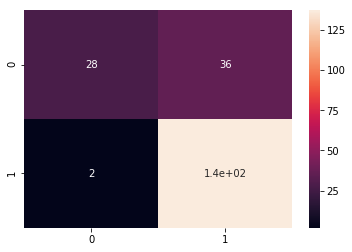

In [168]:
sns.heatmap(cr,annot=True)

# Accuracy score of the model is 81.2%

Type 1 error is 36
Type 2 error is 2 

saving model

In [143]:
import pickle

In [144]:
loan_pred = 'loan.pkl'

In [146]:
pickle.dump(g,open(loan_pred,'wb'))

conclusion

In [149]:
original_val = np.array(y_test)
predicted_val = np.array(g.predict(x_test))
df_con = pd.DataFrame({'original_values':original_val,
                      'predicted_val':predicted_val})

In [157]:
df_con.head(3)

,original_values,predicted_val
0,1,1
1,1,1
2,1,1
